In [76]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Metadata

| Column                    | Description                                                |
|---------------------------|------------------------------------------------------------|
| year                      | Year                                                       |
| quarter                   | Quarter of the year                                        |
| day_of_month              | Day of the month                                           |
| day_of_week               | Day of the week                                            |
| flight_date               | Date of the flight                                         |
| marketing_airline_network | Unique Marketing Carrier Code                              |
| origin_city_name          | Origin Airport, City Name                                  |
| dest_city_name            | Destination Airport, City Name                             |
| crs_dep_time              | Scheduled Departure Time (local time: hhmm)               |
| dep_time                  | Actual Departure Time (local time: hhmm)                  |
| dep_delay                 | Difference in minutes between scheduled and actual departure time |
| dep_delay_minutes         | Difference in minutes between scheduled and actual departure time (early departures set to 0) |
| taxi_out                  | Taxi Out Time (duration from gate to runway) in Minutes   |
| wheels_off                | Wheels-Off Time (local time: hhmm)                         |
| wheels_on                 | Wheels-On Time (local time: hhmm)                         |
| taxi_in                   | Taxi In Time (duration from runway to gate) in Minutes    |
| crs_arr_time              | Scheduled Arrival Time (local time: hhmm)                 |
| arr_time                  | Actual Arrival Time (local time: hhmm)                    |
| arr_delay                 | Difference in minutes between scheduled and actual arrival time |
| arr_delay_minutes         | Difference in minutes between scheduled and actual arrival time (early arrivals set to 0) |
| crs_elapsed_time          | Scheduled Elapsed Time of Flight in Minutes               |
| actual_elapsed_time       | Elapsed Time of Flight in Minutes                         |
| air_time                  | Flight Time in Minutes                                    |
| distance                  | Distance between airports (miles)                         |
| distance_group            | Distance Intervals (every 250 miles) for Flight Segment   |
| carrier_delay             | Carrier Delay in Minutes                                  |
| weather_delay             | Weather Delay in Minutes                                  |
| nas_delay                 | National Air System Delay in Minutes                      |
| security_delay            | Security Delay in Minutes                                 |
| late_aircraft_delay        | Late Aircraft Delay in Minutes                            |


# Questions 
1. Which airport has the highest delay minutes? (destination & orginal airport)
2. Which Airlines has the most delay minutes?
3. What part of the day have the most dalay (morning, afternoon, evening)?
4. What season has the most amounts of delaied flights?
5. What kind of things cause the departure and arrival delay?
6. The trend of delay from 2018-2023?
7. What types of delay correlate to the arrival and departure delay?

In [77]:
# Import Data
df = pd.read_parquet("Flight_Delay.parquet")
pd.set_option("display.max_columns", None)

# Data Exploration
An over view of summary statistic of the dataset and create variables and functions for the analysis

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30132672 entries, 1 to 596675
Data columns (total 29 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   Year                       int64  
 1   Month                      int64  
 2   DayofMonth                 int64  
 3   FlightDate                 object 
 4   Marketing_Airline_Network  object 
 5   OriginCityName             object 
 6   DestCityName               object 
 7   CRSDepTime                 int64  
 8   DepTime                    float64
 9   DepDelay                   float64
 10  DepDelayMinutes            float64
 11  TaxiOut                    float64
 12  WheelsOff                  float64
 13  WheelsOn                   float64
 14  TaxiIn                     float64
 15  CRSArrTime                 int64  
 16  ArrTime                    float64
 17  ArrDelay                   float64
 18  ArrDelayMinutes            float64
 19  CRSElapsedTime             float64
 20  ActualE

In [79]:
df.shape

(30132672, 29)

In [80]:
df.columns

Index(['Year', 'Month', 'DayofMonth', 'FlightDate',
       'Marketing_Airline_Network', 'OriginCityName', 'DestCityName',
       'CRSDepTime', 'DepTime', 'DepDelay', 'DepDelayMinutes', 'TaxiOut',
       'WheelsOff', 'WheelsOn', 'TaxiIn', 'CRSArrTime', 'ArrTime', 'ArrDelay',
       'ArrDelayMinutes', 'CRSElapsedTime', 'ActualElapsedTime', 'AirTime',
       'Distance', 'DistanceGroup', 'CarrierDelay', 'WeatherDelay', 'NASDelay',
       'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

In [81]:
df.describe()

,Year,Month,DayofMonth,CRSDepTime,DepTime,DepDelay,DepDelayMinutes,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrTime,ArrDelay,ArrDelayMinutes,CRSElapsedTime,ActualElapsedTime,AirTime,Distance,DistanceGroup,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,3.013267e+07,3.013267e+07,3.013267e+07,3.013267e+07,3.013267e+07,3.013267e+07,3.013267e+07,3.013267e+07,3.013267e+07,3.013267e+07,3.013267e+07,3.013267e+07,3.013267e+07,3.013267e+07,3.013267e+07,3.013267e+07,3.013267e+07,3.013267e+07,3.013267e+07,3.013267e+07,3.013267e+07,3.013267e+07,3.013267e+07,3.013267e+07,3.013267e+07
mean,2.020091e+03,6.297564e+00,1.572297e+01,1.322736e+03,1.327245e+03,1.061144e+01,1.429690e+01,1.650212e+01,1.350119e+03,1.456780e+03,7.453306e+00,1.485342e+03,1.462064e+03,3.754417e+00,1.443629e+01,1.388678e+02,1.320092e+02,1.080538e+02,7.764743e+02,3.580303e+00,5.050473e+00,8.417200e-01,2.994112e+00,2.741088e-02,5.522570e+00
std,1.602171e+00,3.487835e+00,8.770224e+00,4.840125e+02,4.983890e+02,5.198293e+01,5.081470e+01,9.467169e+00,4.998794e+02,5.249568e+02,6.024017e+00,5.081119e+02,5.286442e+02,5.454628e+01,5.072644e+01,7.096150e+01,7.061227e+01,6.872621e+01,5.823315e+02,2.291205e+00,3.370024e+01,1.509353e+01,1.664252e+01,1.650743e+00,2.751737e+01
min,2.018000e+03,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-3.420000e+02,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,-1.290000e+03,0.000000e+00,-2.920000e+02,4.000000e+00,-1.412000e+03,1.600000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.019000e+03,3.000000e+00,8.000000e+00,9.150000e+02,9.160000e+02,-6.000000e+00,0.000000e+00,1.100000e+01,9.310000e+02,1.046000e+03,4.000000e+00,1.105000e+03,1.050000e+03,-1.700000e+01,0.000000e+00,8.800000e+01,8.100000e+01,5.800000e+01,3.520000e+02,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.020000e+03,6.000000e+00,1.600000e+01,1.315000e+03,1.320000e+03,-3.000000e+00,0.000000e+00,1.400000e+01,1.333000e+03,1.456000e+03,6.000000e+00,1.510000e+03,1.500000e+03,-9.000000e+00,0.000000e+00,1.200000e+02,1.140000e+02,9.000000e+01,6.200000e+02,3.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,2.022000e+03,9.000000e+00,2.300000e+01,1.729000e+03,1.737000e+03,3.000000e+00,3.000000e+00,1.900000e+01,1.751000e+03,1.903000e+03,9.000000e+00,1.914000e+03,1.909000e+03,-1.000000e+00,0.000000e+00,1.690000e+02,1.620000e+02,1.370000e+02,1.011000e+03,5.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,2.023000e+03,1.200000e+01,3.100000e+01,2.359000e+03,2.400000e+03,7.223000e+03,7.223000e+03,1.439000e+03,2.400000e+03,2.400000e+03,1.082000e+03,2.400000e+03,2.400000e+03,7.232000e+03,7.232000e+03,1.645000e+03,1.604000e+03,1.557000e+03,5.812000e+03,1.100000e+01,7.232000e+03,2.900000e+03,1.848000e+03,1.460000e+03,2.962000e+03


In [82]:
# Check missing value of each column
missing_percentage = (df.isnull().sum() / len(df)) * 100
print(missing_percentage)

Year                         0.0
Month                        0.0
DayofMonth                   0.0
FlightDate                   0.0
Marketing_Airline_Network    0.0
OriginCityName               0.0
DestCityName                 0.0
CRSDepTime                   0.0
DepTime                      0.0
DepDelay                     0.0
DepDelayMinutes              0.0
TaxiOut                      0.0
WheelsOff                    0.0
WheelsOn                     0.0
TaxiIn                       0.0
CRSArrTime                   0.0
ArrTime                      0.0
ArrDelay                     0.0
ArrDelayMinutes              0.0
CRSElapsedTime               0.0
ActualElapsedTime            0.0
AirTime                      0.0
Distance                     0.0
DistanceGroup                0.0
CarrierDelay                 0.0
WeatherDelay                 0.0
NASDelay                     0.0
SecurityDelay                0.0
LateAircraftDelay            0.0
dtype: float64


# Data Transformation

In [83]:
# Revise the columns name with lower case with underscore
df = df.rename(columns = 
          { "FlightDate": "flight_date",
            "OriginCityName": "origin_city_name", 
            "DestCityName": "dest_city_name",
            "CRSDepTime": "CRS_dep_time",
            "DepTime": "dep_time",
            "DepDelay": "depdelay",
            "DepDelayMinutes": "dep_delay_minutes",
            "TaxiOut": "taxi_out",
            "WheelsOff": "wheels_off",
            "WheelsOn": "wheels_on",
            "TaxiIn": "taxi_in",
            "CRSArrTime": "CRS_arr_time",
            "ArrTime": "arr_time",
            "ArrDelay": "arr_delay",
            "ArrDelayMinutes": "arr_delay_minutes",
            "CRSElapsedTime": "CRS_elapsed_time",
            "ActualElapsedTime": "actual_elapsed_time",
            "AirTime": "air_time",
            "Distance": "distance",
            "DistanceGroup": "distance_group",
            "CarrierDelay": "carrier_delay",
            "WeatherDelay": "weather_delay",
            "NASDelay": "NAS_delay",
            "SecurityDelay": "security_delay",
            "LateAircraftDelay": "late_aircraft_delay",
            "DayofMonth": "day_of_month"
          }).copy()

In [84]:
df = df.sample(frac = 0.001)

In [85]:
# Convert flight_date column into datetime
df["flight_date"] = pd.to_datetime(df["flight_date"])

# Add week_of_day variable
df["day_of_week"] = df["flight_date"].dt.day_name()

# Add month variable
df["flight_month"] = df["flight_date"].dt.month

# Add categorical variable for to identify time-period
df["dep_period"] = pd.cut(x = df["CRS_dep_time"], bins = [0, 600, 1200, 1800, 2359],\
                           labels = ["Midnight", "Morning", "Afternoon", "Night"])

df["arr_period"] = pd.cut(x = df["CRS_arr_time"], bins = [0, 600, 1200, 1800, 2359],\
                           labels = ["Midnight", "Morning", "Afternoon", "Night"])

In [86]:
# Add full carrier name as a new variable
def airline_abbreviation_to_name(x): 
    airline_abb = {
        "UA" : "United Airlines",
        "DL" : "Delta Airlines",
        "F9" : "Frontier Airlines",
        "NK" : "Spirit Airlines",
        "AA" : "American Airlines",
        "WN" : "Southwest Airlines",
        "AS" : "Alaska Airlines",
        "HA" : "Hawaiian Airlines",
        "VX" : "Virgin America",
        "B6" : "JetBlue Airways",
        "G4" : "Allegiant Air",    
    }
    for key, value in airline_abb.items():
        if x == key:
            x = value
    return x

df["Airline"] = df["Marketing_Airline_Network"].apply(airline_abbreviation_to_name)

In [87]:
# Check for duplicate data
df.loc[df.duplicated()]
# Drop the Marketing_Airline_Network column
df = df.drop(columns = "Marketing_Airline_Network")

In [88]:
# Function to calculate necessary statistics for outlier
def outlier_stat(serise):
    if isinstance(serise, pd.Series):
        Q1 = serise.quantile(0.25)
        Q3 = serise.quantile(0.75)
        IQR = Q3 - Q1
        higher_bond = Q3 + 1.5 * IQR
        lower_bond = Q1 - 1.5 * IQR
        return Q1, Q3, IQR,lower_bond, higher_bond
    else:
        raise TypeError("The argument passed in is not pandas serise")

# Feature Understanding

In [89]:
df

,Year,Month,day_of_month,flight_date,origin_city_name,dest_city_name,CRS_dep_time,dep_time,depdelay,dep_delay_minutes,taxi_out,wheels_off,wheels_on,taxi_in,CRS_arr_time,arr_time,arr_delay,arr_delay_minutes,CRS_elapsed_time,actual_elapsed_time,air_time,distance,distance_group,carrier_delay,weather_delay,NAS_delay,security_delay,late_aircraft_delay,day_of_week,flight_month,dep_period,arr_period,Airline
323476,2018,9,18,2018-09-18,"Dallas/Fort Worth, TX","Richmond, VA",1430,1426.0,-4.0,0.0,11.0,1437.0,1810.0,6.0,1817,1816.0,-1.0,0.0,167.0,170.0,153.0,1158.0,5,0.0,0.0,0.0,0.0,0.0,Tuesday,9,Afternoon,Night,American Airlines
74688,2019,9,5,2019-09-05,"Birmingham, AL","Orlando, FL",830,827.0,-3.0,0.0,17.0,844.0,1049.0,10.0,1108,1059.0,-9.0,0.0,98.0,92.0,65.0,479.0,2,0.0,0.0,0.0,0.0,0.0,Thursday,9,Morning,Morning,Frontier Airlines
151638,2021,7,18,2021-07-18,"Chicago, IL","Fayetteville, AR",1945,1952.0,7.0,7.0,20.0,2012.0,2127.0,8.0,2135,2135.0,0.0,0.0,110.0,103.0,75.0,522.0,3,0.0,0.0,0.0,0.0,0.0,Sunday,7,Night,Night,United Airlines
431047,2021,4,5,2021-04-05,"Valparaiso, FL","Chicago, IL",1330,1337.0,7.0,7.0,10.0,1347.0,1548.0,12.0,1610,1600.0,-10.0,0.0,160.0,143.0,121.0,796.0,4,0.0,0.0,0.0,0.0,0.0,Monday,4,Afternoon,Afternoon,American Airlines
599232,2020,1,13,2020-01-13,"Chicago, IL","Minneapolis, MN",615,1042.0,267.0,267.0,12.0,1054.0,1209.0,2.0,800,1211.0,251.0,251.0,105.0,89.0,75.0,349.0,2,251.0,0.0,0.0,0.0,0.0,Monday,1,Morning,Morning,Delta Airlines
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578842,2018,12,17,2018-12-17,"Chicago, IL","Indianapolis, IN",1330,1326.0,-4.0,0.0,10.0,1336.0,1504.0,3.0,1535,1507.0,-28.0,0.0,65.0,41.0,28.0,177.0,1,0.0,0.0,0.0,0.0,0.0,Monday,12,Afternoon,Afternoon,American Airlines
67166,2021,7,7,2021-07-07,"Omaha, NE","Chicago, IL",615,613.0,-2.0,0.0,8.0,621.0,729.0,8.0,740,737.0,-3.0,0.0,85.0,84.0,68.0,423.0,2,0.0,0.0,0.0,0.0,0.0,Wednesday,7,Morning,Morning,Southwest Airlines
189669,2020,9,10,2020-09-10,"Lexington, KY","Philadelphia, PA",818,811.0,-7.0,0.0,14.0,825.0,949.0,6.0,1000,955.0,-5.0,0.0,102.0,104.0,84.0,520.0,3,0.0,0.0,0.0,0.0,0.0,Thursday,9,Morning,Morning,American Airlines
519535,2020,2,24,2020-02-24,"Oakland, CA","Los Angeles, CA",2050,2113.0,23.0,23.0,13.0,2126.0,2223.0,22.0,2214,2245.0,31.0,31.0,84.0,92.0,57.0,337.0,2,13.0,0.0,8.0,0.0,10.0,Monday,2,Night,Night,Spirit Airlines


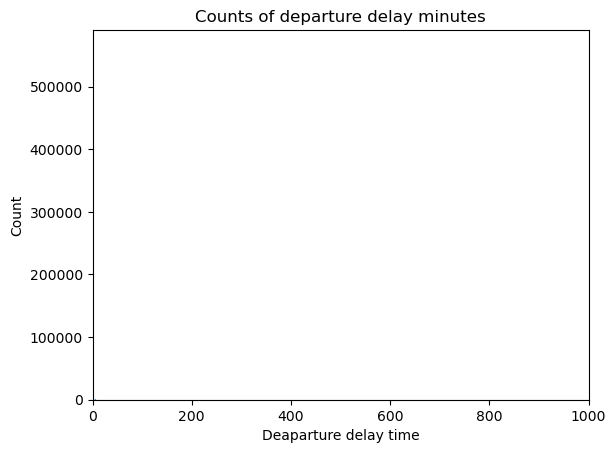

In [90]:
# The distribution of the delay minutes
sns.histplot(data = df, x = "dep_delay_minutes", bins = 1000)
plt.xlim(left = 0, right = 1000)
plt.ylim(bottom = 0, top = 590000)
plt.title("Counts of departure delay minutes")
plt.xlabel("Deaparture delay time")
plt.show()

In [91]:
df["dep_delay_minutes"].value_counts()

dep_delay_minutes
0.0      21215
1.0        579
2.0        447
3.0        381
4.0        351
         ...  
607.0        1
550.0        1
354.0        1
249.0        1
226.0        1
Name: count, Length: 392, dtype: int64

Text(0.5, 0, 'Deaparture delay time')

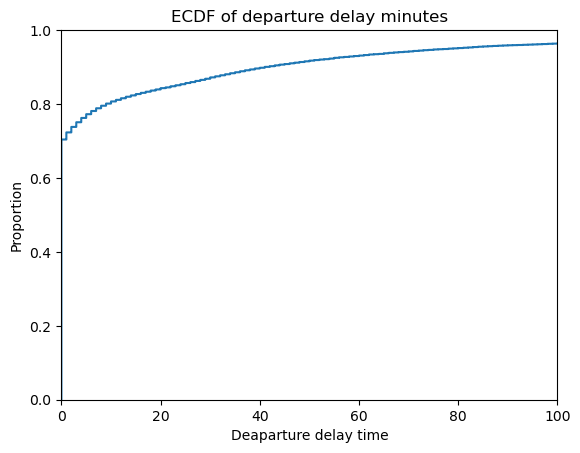

In [92]:
# ECDF plot
sns.ecdfplot(data = df, x = "dep_delay_minutes")
plt.xlim(left = 0, right = 100)
plt.title("ECDF of departure delay minutes")
plt.xlabel("Deaparture delay time")

For the departure delay time. There are 21,200,272 flights with 0 minutes delay and 586,761 flights with 1 mintues delay. For the readibility. The histgram's y limit is set on 590,000. The histogram is right-skewd. It means the most fights delay time is lower time. In the ECDF plot, the x limit is set on 100. We could tell that more than 70% flight is with 0 minutes delay and 95% of the flights has less than 100 minutes delay. That means we should focuse on issueses that cause short delay times. 

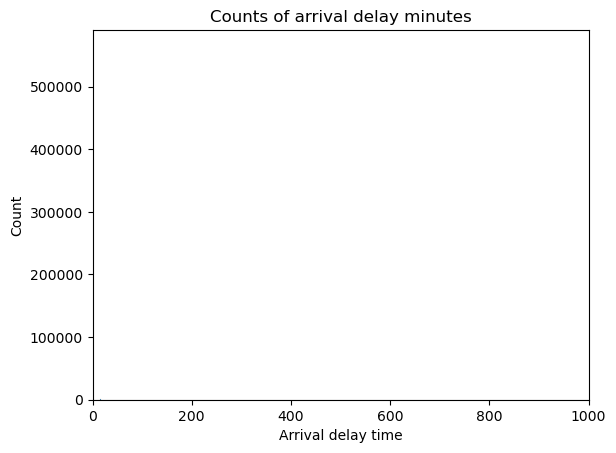

In [93]:
# The distribution of arr_delay_minutes
sns.histplot(data = df, x = "arr_delay_minutes", bins = 1000)
plt.xlim(left = 0, right = 1000)
plt.ylim(bottom = 0, top = 590000)
plt.title("Counts of arrival delay minutes")
plt.xlabel("Arrival delay time")
plt.show()

In [94]:
df["arr_delay_minutes"].value_counts()

arr_delay_minutes
0.0      23648
15.0       240
17.0       212
19.0       210
16.0       204
         ...  
809.0        1
308.0        1
539.0        1
345.0        1
370.0        1
Name: count, Length: 374, dtype: int64

Text(0.5, 0, 'Arrival delay time')

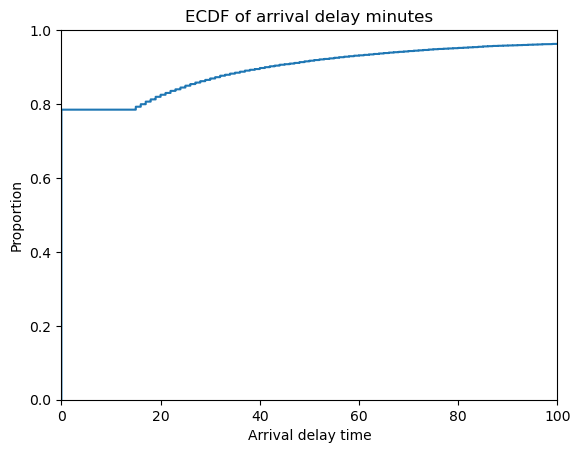

In [95]:
sns.ecdfplot(data = df, x = "arr_delay_minutes")
plt.xlim(left = 0, right = 100)
plt.title("ECDF of arrival delay minutes")
plt.xlabel("Arrival delay time")

In [96]:
# Check the data with 0-15 minutes arrrival delay time
df_15 = df[(df["arr_delay_minutes"] < 15) & (df["arr_delay_minutes"] > 0)]

In [97]:
df_15.shape

(0, 33)

In [98]:
del df_15

For the arrival delay time. There are 23,660,924 flights with 0 minutes delay. For the second largest amount of delay minutes is 15 minutes, which has 224,826. For the readibility. The histgram's y limit is set on 590,000. The histogram is right-skewd. It means the most fights delay time is lower time. In the ECDF plot, the x limit is set on 100. We could tell that almost 80% flight is with 0 minutes delay and there is no flght's arrival delay minutes between 1 to 15 minutes.

In [99]:
df.columns

Index(['Year', 'Month', 'day_of_month', 'flight_date', 'origin_city_name',
       'dest_city_name', 'CRS_dep_time', 'dep_time', 'depdelay',
       'dep_delay_minutes', 'taxi_out', 'wheels_off', 'wheels_on', 'taxi_in',
       'CRS_arr_time', 'arr_time', 'arr_delay', 'arr_delay_minutes',
       'CRS_elapsed_time', 'actual_elapsed_time', 'air_time', 'distance',
       'distance_group', 'carrier_delay', 'weather_delay', 'NAS_delay',
       'security_delay', 'late_aircraft_delay', 'day_of_week', 'flight_month',
       'dep_period', 'arr_period', 'Airline'],
      dtype='object')

# Which airport has the highest delay minutes

## Departure delay

In [100]:
# The airport with the most delay minutes
df_the_most_delaied_city_dp = df.groupby("origin_city_name")["dep_delay_minutes"]\
.describe().sort_values("mean", ascending = False).head(10)

df_the_most_delaied_city_dp

,count,mean,std,min,25%,50%,75%,max
origin_city_name,,,,,,,,
"Scottsbluff, NE",6.0,156.000000,380.164175,0.0,0.00,0.0,3.00,932.0
"Newburgh/Poughkeepsie, NY",7.0,152.571429,162.856642,0.0,49.50,122.0,184.00,479.0
"Hagerstown, MD",1.0,126.000000,NaN,126.0,126.00,126.0,126.00,126.0
"Mammoth Lakes, CA",2.0,125.000000,155.563492,15.0,70.00,125.0,180.00,235.0
"Rapid City, SD",21.0,118.380952,359.058000,0.0,0.00,0.0,9.00,1245.0
"Dickinson, ND",1.0,84.000000,NaN,84.0,84.00,84.0,84.00,84.0
"Roswell, NM",8.0,72.375000,204.303652,0.0,0.00,0.0,0.25,578.0
"Moab, UT",2.0,70.500000,99.702056,0.0,35.25,70.5,105.75,141.0
"Staunton, VA",3.0,69.333333,120.088856,0.0,0.00,0.0,104.00,208.0


Text(0.5, 0, 'Departure delay time')

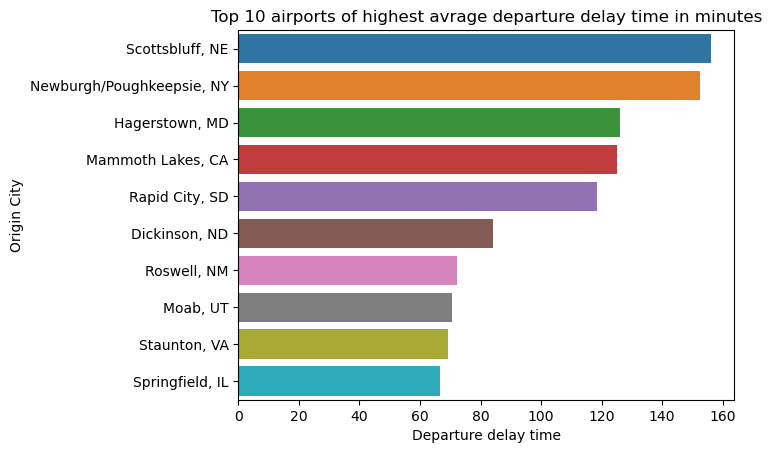

In [101]:
# Plot the average departure delay minutes in each airport
sns.barplot(data = df_the_most_delaied_city_dp, x = "mean",\
            y = df_the_most_delaied_city_dp.index, errorbar = None)
plt.title("Top 10 airports of highest avrage departure delay time in minutes")
plt.ylabel("Origin City")
plt.xlabel("Departure delay time")

In [102]:
del df_the_most_delaied_city_dp

The top 10 airports with highest departure delay time are all airpots with small volume of traffic except Aspen, CO. And the avarege departures delay minutes is approximately 43.128 minutes. It is difficult to see a comprehensive result, so I will delete the outlier.

### Departure dealy without outliers

In [103]:
# Use the function to get outlier higher and lower bound 
Q1, Q3, IQR,lower_bond, higher_bond = outlier_stat(df["dep_delay_minutes"])

# Subset to get the series without outlier
df_dep_delay_without_outli = df[(df["dep_delay_minutes"] > lower_bond) & (df["dep_delay_minutes"] < higher_bond)]

df_dep_delay_without_outli = df_dep_delay_without_outli.groupby("origin_city_name")["dep_delay_minutes"]\
.describe().sort_values("mean", ascending = False).head(10)

df_dep_delay_without_outli

,count,mean,std,min,25%,50%,75%,max
origin_city_name,,,,,,,,
"Ponce, PR",1.0,7.000000,NaN,7.0,7.00,7.0,7.00,7.0
"Cheyenne, WY",1.0,4.000000,NaN,4.0,4.00,4.0,4.00,4.0
"Bemidji, MN",2.0,2.000000,2.828427,0.0,1.00,2.0,3.00,4.0
"Waco, TX",4.0,1.750000,3.500000,0.0,0.00,0.0,1.75,7.0
"Latrobe, PA",2.0,1.500000,2.121320,0.0,0.75,1.5,2.25,3.0
"Scranton/Wilkes-Barre, PA",11.0,1.454545,2.583162,0.0,0.00,0.0,2.00,7.0
"Paducah, KY",3.0,1.333333,2.309401,0.0,0.00,0.0,2.00,4.0
"Valdosta, GA",3.0,1.333333,2.309401,0.0,0.00,0.0,2.00,4.0
"Ithaca/Cortland, NY",9.0,1.000000,2.345208,0.0,0.00,0.0,0.00,7.0


Text(0.5, 0, 'Departure delay time')

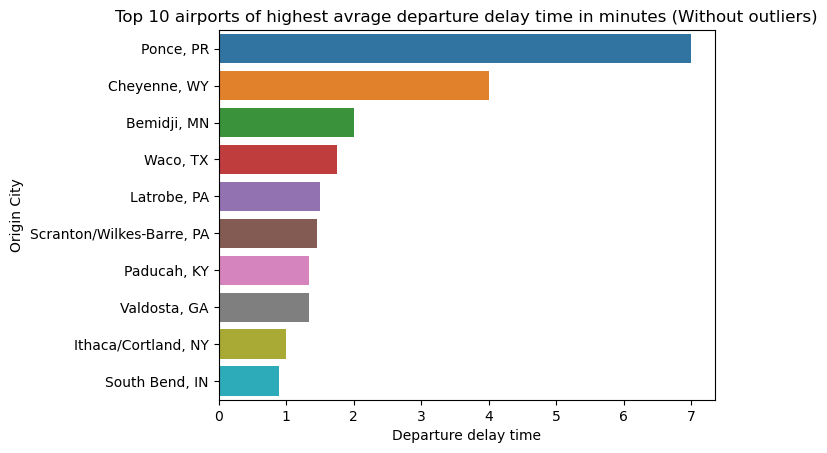

In [104]:
# Plot the average departure delay minutes in each airport without outliers
sns.barplot(data = df_dep_delay_without_outli, x = "mean",\
            y = df_dep_delay_without_outli.index, errorbar = None)
plt.title("Top 10 airports of highest avrage departure delay time in minutes (Without outliers)")
plt.ylabel("Origin City")
plt.xlabel("Departure delay time")

The barchart shows top 10 airports with highest departure delay time and without outlier. Half of these airpots with small volume of traffic. And the avarege departures delay minutes is approximately 0.66 minutes. Showing that most of airports have departure delay time under 1 minutes.

In [105]:
del df_dep_delay_without_outli

## Arrival delay

In [106]:
# The airport with the most delay minutes
df_the_most_delaied_city_ar = df.groupby("dest_city_name")["arr_delay_minutes"]\
.describe().sort_values("mean", ascending = False).head(10)

df_the_most_delaied_city_ar

,count,mean,std,min,25%,50%,75%,max
dest_city_name,,,,,,,,
"Marquette, MI",1.0,194.00,NaN,194.0,194.00,194.0,194.00,194.0
"Pierre, SD",7.0,153.00,254.383569,0.0,0.00,0.0,194.00,683.0
"Cape Girardeau, MO",4.0,137.50,275.000000,0.0,0.00,0.0,137.50,550.0
"Vernal, UT",1.0,116.00,NaN,116.0,116.00,116.0,116.00,116.0
"Sheridan, WY",2.0,114.50,139.300036,16.0,65.25,114.5,163.75,213.0
"Williamsport, PA",1.0,106.00,NaN,106.0,106.00,106.0,106.00,106.0
"Christiansted, VI",4.0,98.25,93.834517,0.0,39.75,88.0,146.50,217.0
"Longview, TX",3.0,93.00,73.328030,24.0,54.50,85.0,127.50,170.0
"Laredo, TX",12.0,92.00,271.740183,0.0,0.00,0.0,7.50,947.0


Text(0.5, 0, 'Arrival delay time')

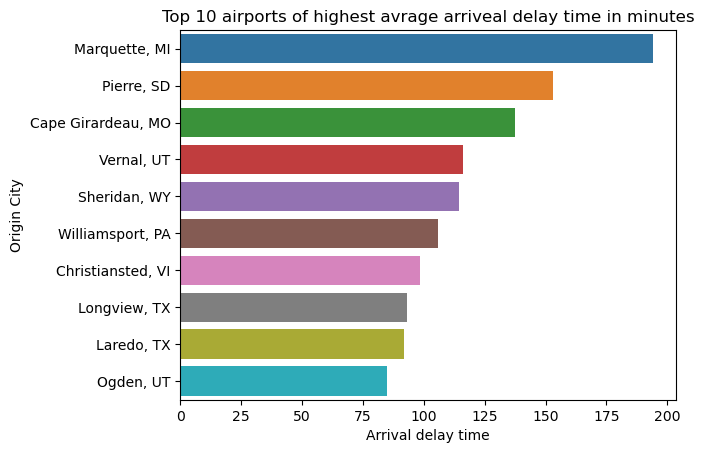

In [107]:
# Plot the average departure delay minutes in each airport
sns.barplot(data = df_the_most_delaied_city_ar, x = "mean",\
            y = df_the_most_delaied_city_ar.index, errorbar = None)
plt.title("Top 10 airports of highest avrage arriveal delay time in minutes")
plt.ylabel("Origin City")
plt.xlabel("Arrival delay time")

Half of the top 10 airports with highest departure delay time are medium traffic volume airpoets. And the avarege departures delay minutes is approximately 43.128 minutes. 

In [108]:
del df_the_most_delaied_city_ar

# Which airlines has the most delay in minutes?

## Departure Delay

In [109]:
# The data of depaetures delay in each airline
df_airline_dep_delay = df.groupby("Airline")["dep_delay_minutes"].describe()\
.sort_values(by = "mean", ascending = False)

df_airline_dep_delay

,count,mean,std,min,25%,50%,75%,max
Airline,,,,,,,,
JetBlue Airways,1056.0,22.717803,53.124729,0.0,0.0,0.0,22.00,514.0
Frontier Airlines,558.0,21.247312,65.512780,0.0,0.0,0.0,15.75,964.0
Spirit Airlines,787.0,19.959339,78.204914,0.0,0.0,0.0,6.00,1126.0
United Airlines,5767.0,17.184151,64.549836,0.0,0.0,0.0,2.00,1245.0
Allegiant Air,460.0,16.526087,44.209165,0.0,0.0,0.0,13.25,479.0
American Airlines,7672.0,13.556178,44.961427,0.0,0.0,0.0,2.00,880.0
Delta Airlines,6663.0,12.652109,55.374750,0.0,0.0,0.0,0.00,1147.0
Southwest Airlines,5269.0,12.223951,30.401008,0.0,0.0,0.0,9.00,465.0
Hawaiian Airlines,269.0,10.947955,64.431129,0.0,0.0,0.0,3.00,1020.0


Text(0.5, 0, 'Departure delay')

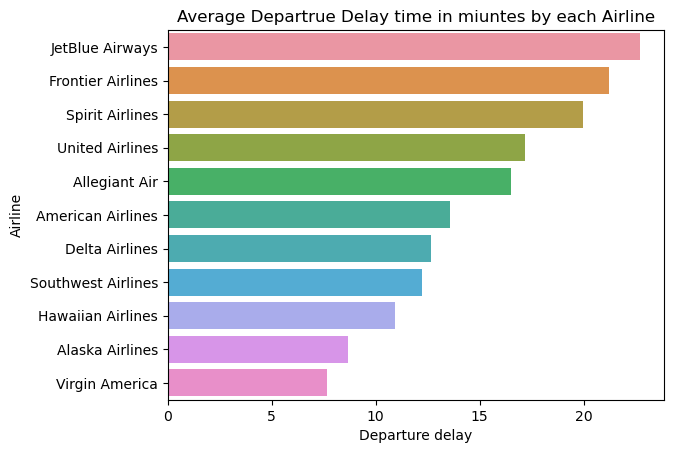

In [110]:
sns.barplot(data = df_airline_dep_delay, x = "mean", y = df_airline_dep_delay.index)
plt.title("Average Departrue Delay time in miuntes by each Airline")
plt.xlabel("Departure delay")

The JetBlue has the most highest departure delay time. However, the median of the departure delay time of each airline are all 0. The major reason of having high mean of delay minutes liing on those flight which has high delay time.

In [111]:
del df_airline_dep_delay

## Arrival delay

In [112]:
df_airline_arr_delay = df.groupby("Airline")["arr_delay_minutes"].describe()\
.sort_values(by = "mean", ascending = False)

df_airline_arr_delay

,count,mean,std,min,25%,50%,75%,max
Airline,,,,,,,,
JetBlue Airways,1056.0,23.310606,52.970546,0.0,0.0,0.0,27.0,502.0
Spirit Airlines,787.0,21.209657,79.497007,0.0,0.0,0.0,15.0,1129.0
Frontier Airlines,558.0,21.014337,65.079483,0.0,0.0,0.0,22.0,990.0
Allegiant Air,460.0,18.606522,45.187042,0.0,0.0,0.0,22.0,454.0
United Airlines,5767.0,17.787585,64.419044,0.0,0.0,0.0,0.0,1242.0
American Airlines,7672.0,14.126825,44.843056,0.0,0.0,0.0,0.0,881.0
Delta Airlines,6663.0,12.654810,54.904959,0.0,0.0,0.0,0.0,1117.0
Hawaiian Airlines,269.0,11.884758,65.209520,0.0,0.0,0.0,0.0,1022.0
Southwest Airlines,5269.0,10.916303,29.979239,0.0,0.0,0.0,0.0,437.0


Text(0.5, 0, 'Departure delay')

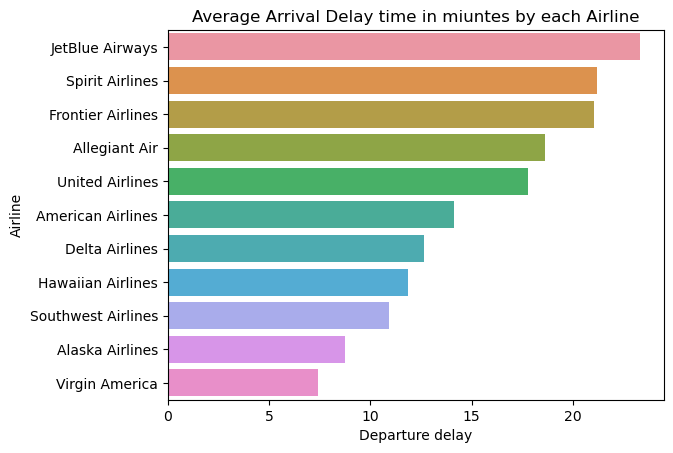

In [113]:
sns.barplot(data = df_airline_arr_delay, x = "mean", y = df_airline_arr_delay.index)
plt.title("Average Arrival Delay time in miuntes by each Airline")
plt.xlabel("Departure delay")

The JetBlue has the most highest arrival delay time. The median of the arrival delay time of each airline are all 0. The median of average arrival time is 0 after the third places. So, the major reason of having high mean of delay minutes liing more on those flight which has high delay time for the arrival delay time.

In [114]:
del df_airline_arr_delay

In [115]:
df.columns

Index(['Year', 'Month', 'day_of_month', 'flight_date', 'origin_city_name',
       'dest_city_name', 'CRS_dep_time', 'dep_time', 'depdelay',
       'dep_delay_minutes', 'taxi_out', 'wheels_off', 'wheels_on', 'taxi_in',
       'CRS_arr_time', 'arr_time', 'arr_delay', 'arr_delay_minutes',
       'CRS_elapsed_time', 'actual_elapsed_time', 'air_time', 'distance',
       'distance_group', 'carrier_delay', 'weather_delay', 'NAS_delay',
       'security_delay', 'late_aircraft_delay', 'day_of_week', 'flight_month',
       'dep_period', 'arr_period', 'Airline'],
      dtype='object')

## Delay kind of each Airline

Text(0.5, 1.0, 'Mean of different kind of delay time by Airline')

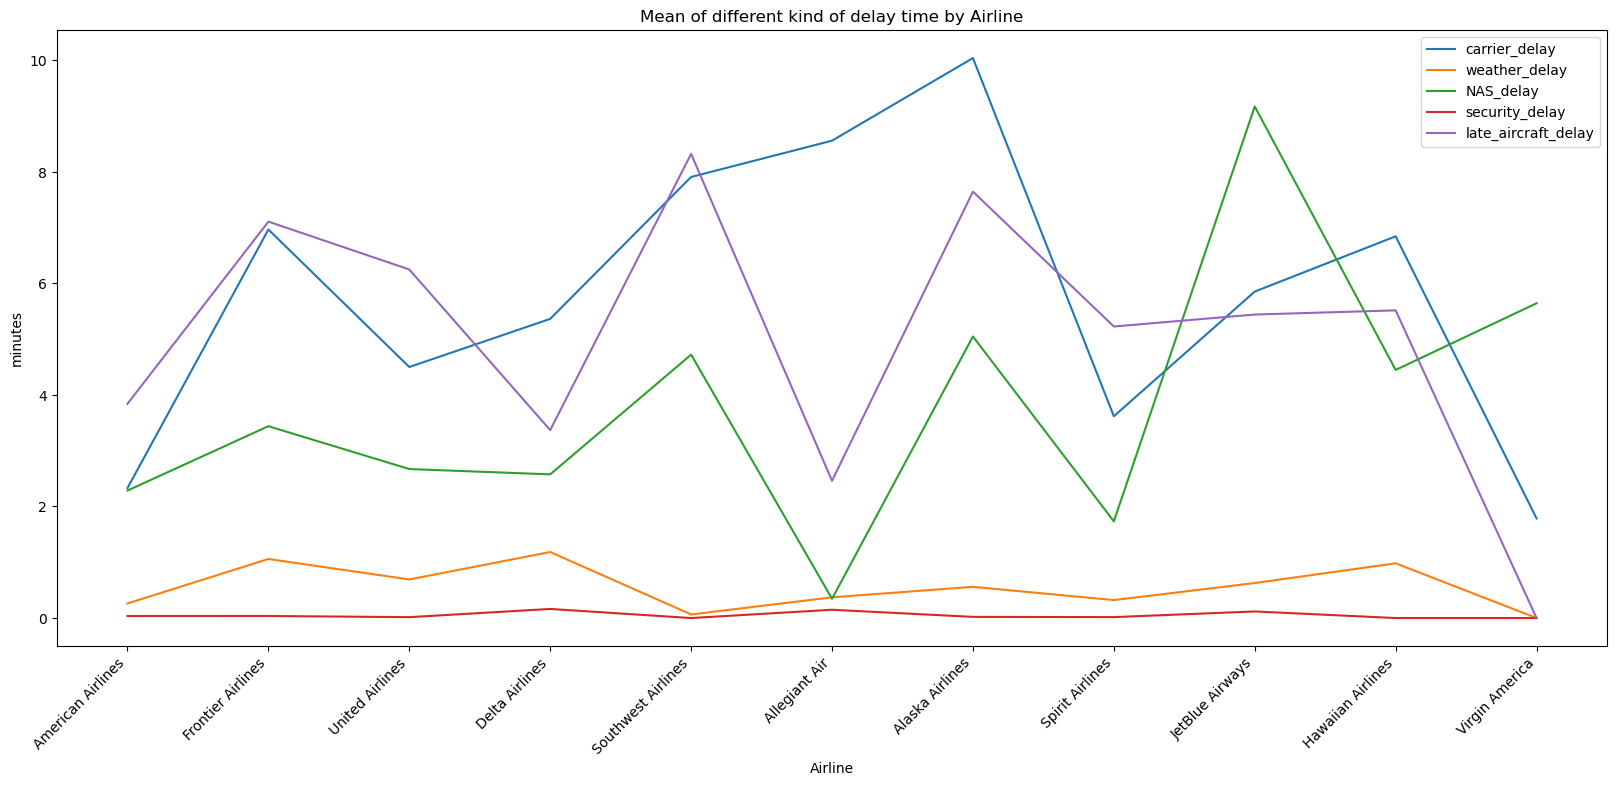

In [116]:
# Mean of each kind of delay groupby airline
fig, ax = plt.subplots(figsize = (20,8)) 
df_airline = df[["Airline", "carrier_delay", "weather_delay", "NAS_delay",\
                 "security_delay", "late_aircraft_delay"]]
df_dep_delay_airline = df_airline.groupby("Airline").mean().plot(kind = "line", ax = ax)
ax.set_xticks(range(len(df_airline["Airline"].unique())))
ax.set_xticklabels(df_airline["Airline"].unique(), rotation = 45, ha = "right")
plt.ylabel("minutes")
plt.title("Mean of different kind of delay time by Airline")

The weather and securtiy delay of each airline are lower than other kind of delay. Dealta, American, and Alaska Airlines have relativly higher carrier, NAS, and late aircraft delay. In addition, Virgin airlines has higer NAS delay but low carrier and NAS delay. It is different from other airlines. 

In [117]:
del df_dep_delay_airline

# What part of the day have the most dalay?

## Delay on each day of week

### Arrival Delay

In [118]:
df_day_of_week_arr = df.groupby("day_of_week")["arr_delay_minutes"].describe()\
.sort_values(by = "mean", ascending = False)

df_day_of_week_arr

,count,mean,std,min,25%,50%,75%,max
day_of_week,,,,,,,,
Thursday,4388.0,16.106199,54.298533,0.0,0.0,0.0,0.0,1080.0
Friday,4473.0,16.001565,51.591403,0.0,0.0,0.0,0.0,1242.0
Monday,4443.0,14.588341,48.509453,0.0,0.0,0.0,0.0,1056.0
Sunday,4310.0,14.298376,52.486775,0.0,0.0,0.0,0.0,1129.0
Tuesday,4274.0,14.168928,57.404139,0.0,0.0,0.0,0.0,1190.0
Saturday,3968.0,13.161794,51.113244,0.0,0.0,0.0,0.0,1067.0
Wednesday,4277.0,11.779752,38.674956,0.0,0.0,0.0,0.0,918.0


Text(0, 0.5, 'Day of week')

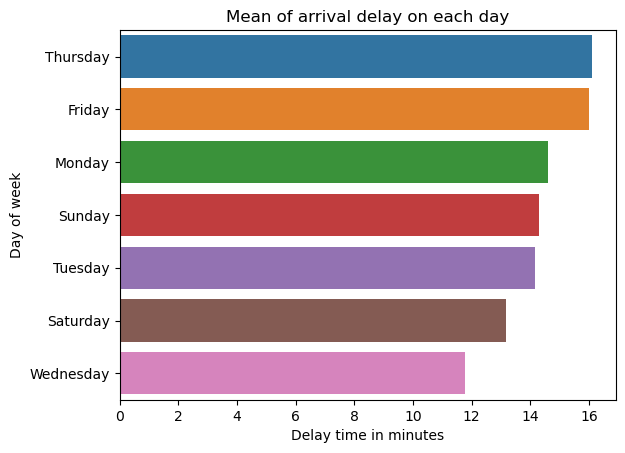

In [119]:
# Plot of the mean of the delay time on each day of the week
sns.barplot(data = df_day_of_week_arr, x = "mean",\
           y = df_day_of_week_arr.index)
plt.title("Mean of arrival delay on each day")
plt.xlabel("Delay time in minutes")
plt.ylabel("Day of week")

The highest mean of arrival delay time is on Friday. The least is on Tuesday. The range of the arrival dealy time is 12.814902 to 15.783283.

In [120]:
del df_day_of_week_arr

## Departure Delay

In [121]:
df_day_of_week_dep = df.groupby("day_of_week")["dep_delay_minutes"].describe()\
.sort_values(by = "mean", ascending = False)

df_day_of_week_dep

,count,mean,std,min,25%,50%,75%,max
day_of_week,,,,,,,,
Thursday,4388.0,15.851641,54.173426,0.0,0.0,0.0,5.0,1097.0
Friday,4473.0,15.818466,51.366324,0.0,0.0,0.0,7.0,1245.0
Sunday,4310.0,14.420186,52.795190,0.0,0.0,0.0,3.0,1126.0
Monday,4443.0,14.385325,48.913923,0.0,0.0,0.0,4.0,1049.0
Tuesday,4274.0,13.947356,57.587323,0.0,0.0,0.0,2.0,1209.0
Saturday,3968.0,13.354335,51.857267,0.0,0.0,0.0,3.0,1105.0
Wednesday,4277.0,11.468319,38.304296,0.0,0.0,0.0,1.0,932.0


Text(0, 0.5, 'Day of week')

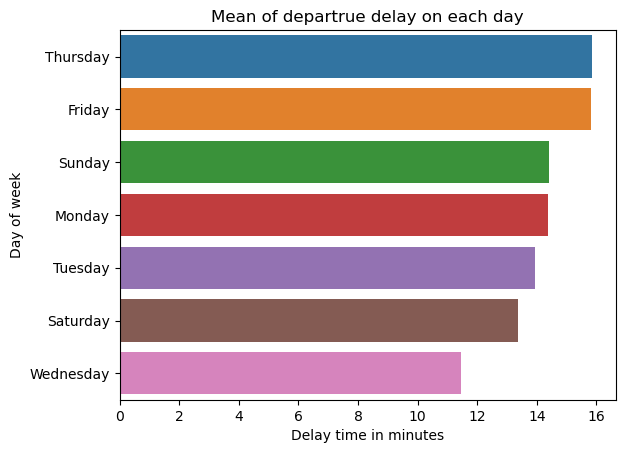

In [122]:
sns.barplot(data = df_day_of_week_dep, x = "mean",\
           y = df_day_of_week_dep.index)
plt.title("Mean of departrue delay on each day")
plt.xlabel("Delay time in minutes")
plt.ylabel("Day of week")

The highest mean of departure delay time is almost identicla as arrival. Arrival delay time in each day is all slightly lower than departure delay.

In [123]:
del df_day_of_week_dep

## Delay on each day of month

### Depature Delay

Text(0.5, 0, 'Day of Month')

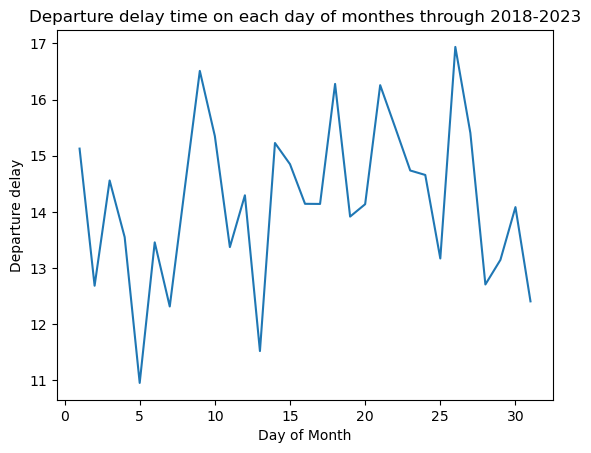

In [124]:
sns.lineplot(data = df, x = "day_of_month", y = "dep_delay_minutes", errorbar = None)
plt.title("Departure delay time on each day of monthes through 2018-2023")
plt.ylabel("Departure delay")
plt.xlabel("Day of Month")

In [125]:
df.groupby("day_of_month")["dep_delay_minutes"].describe()

,count,mean,std,min,25%,50%,75%,max
day_of_month,,,,,,,,
1,928.0,15.126078,42.525280,0.0,0.0,0.0,5.00,403.0
2,1032.0,12.684109,45.002910,0.0,0.0,0.0,2.00,676.0
3,972.0,14.558642,51.363366,0.0,0.0,0.0,3.25,797.0
4,1024.0,13.549805,59.179709,0.0,0.0,0.0,1.00,1038.0
5,984.0,10.953252,33.711055,0.0,0.0,0.0,3.00,421.0
6,1026.0,13.456140,53.088040,0.0,0.0,0.0,3.00,1097.0
7,993.0,12.314199,39.728641,0.0,0.0,0.0,1.00,338.0
8,1069.0,14.423761,44.095116,0.0,0.0,0.0,4.00,607.0
9,1025.0,16.510244,64.020048,0.0,0.0,0.0,4.00,871.0


The highest departure delay time happened in 11th of each month with 15.91 minutes. The plateau period is between 11th to 24th.

### Arrival Delay

Text(0.5, 0, 'Day of Month')

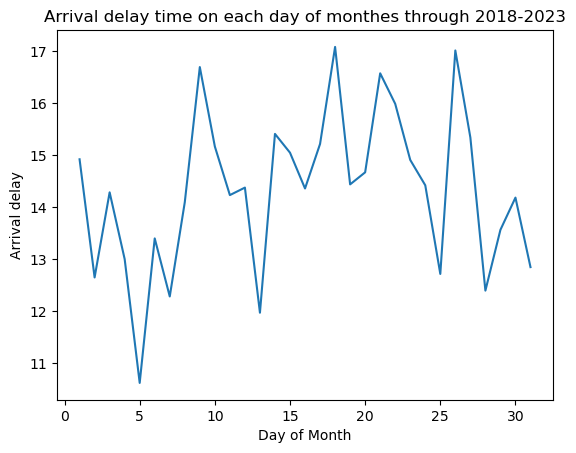

In [126]:
sns.lineplot(data = df, x = "day_of_month", y = "arr_delay_minutes", errorbar = None) 
plt.title("Arrival delay time on each day of monthes through 2018-2023")
plt.ylabel("Arrival delay")
plt.xlabel("Day of Month")

In [127]:
df.groupby("day_of_month")["arr_delay_minutes"].describe()

,count,mean,std,min,25%,50%,75%,max
day_of_month,,,,,,,,
1,928.0,14.921336,41.766176,0.0,0.0,0.0,0.0,406.0
2,1032.0,12.645349,44.558925,0.0,0.0,0.0,0.0,673.0
3,972.0,14.284979,50.662268,0.0,0.0,0.0,0.0,784.0
4,1024.0,12.999023,58.834734,0.0,0.0,0.0,0.0,1085.0
5,984.0,10.613821,32.620529,0.0,0.0,0.0,0.0,410.0
6,1026.0,13.397661,52.613897,0.0,0.0,0.0,0.0,1080.0
7,993.0,12.278953,39.052639,0.0,0.0,0.0,0.0,324.0
8,1069.0,14.094481,43.328955,0.0,0.0,0.0,0.0,592.0
9,1025.0,16.697561,62.893715,0.0,0.0,0.0,0.0,858.0


The distribution of arrival delay time is almost identical as departure. The highest delay in minutes is on 11th of each month with 16.1 minutes. 

## Delay on each time period of a day

### Departure delay

Text(0.5, 0, 'Time period')

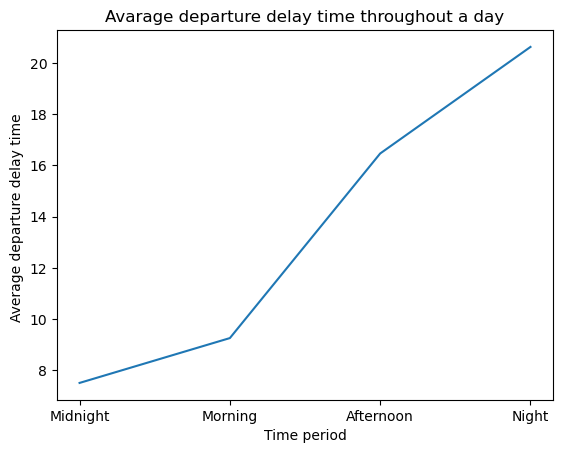

In [128]:
df_arr_dealy_period = df.groupby("dep_period")['dep_delay_minutes'].describe()
sns.lineplot(data = df_arr_dealy_period, x = df_arr_dealy_period.index, y = "mean")
plt.title("Avarage departure delay time throughout a day")
plt.ylabel("Average departure delay time ")
plt.xlabel("Time period")

In [129]:
del df_arr_dealy_period

### Arrival delay

Text(0.5, 0, 'Time period')

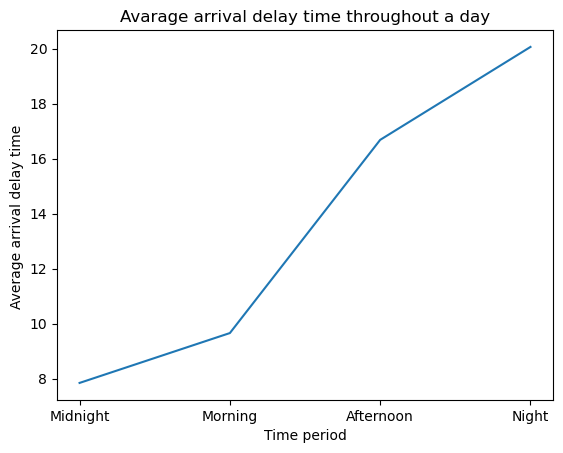

In [130]:
df_dep_dealy_period = df.groupby("dep_period")['arr_delay_minutes'].describe()
sns.lineplot(data = df_dep_dealy_period, x = df_dep_dealy_period.index, y = "mean")
plt.title("Avarage arrival delay time throughout a day")
plt.ylabel("Average arrival delay time ")
plt.xlabel("Time period")

The departure and arrival delay through a day have the same distribution With lowest in midnight(0:00-6:00) and highest in night(18:00-23:59)

In [131]:
del df_dep_dealy_period

# What season has the most amounts of delaied flights?

In [132]:
df

,Year,Month,day_of_month,flight_date,origin_city_name,dest_city_name,CRS_dep_time,dep_time,depdelay,dep_delay_minutes,taxi_out,wheels_off,wheels_on,taxi_in,CRS_arr_time,arr_time,arr_delay,arr_delay_minutes,CRS_elapsed_time,actual_elapsed_time,air_time,distance,distance_group,carrier_delay,weather_delay,NAS_delay,security_delay,late_aircraft_delay,day_of_week,flight_month,dep_period,arr_period,Airline
323476,2018,9,18,2018-09-18,"Dallas/Fort Worth, TX","Richmond, VA",1430,1426.0,-4.0,0.0,11.0,1437.0,1810.0,6.0,1817,1816.0,-1.0,0.0,167.0,170.0,153.0,1158.0,5,0.0,0.0,0.0,0.0,0.0,Tuesday,9,Afternoon,Night,American Airlines
74688,2019,9,5,2019-09-05,"Birmingham, AL","Orlando, FL",830,827.0,-3.0,0.0,17.0,844.0,1049.0,10.0,1108,1059.0,-9.0,0.0,98.0,92.0,65.0,479.0,2,0.0,0.0,0.0,0.0,0.0,Thursday,9,Morning,Morning,Frontier Airlines
151638,2021,7,18,2021-07-18,"Chicago, IL","Fayetteville, AR",1945,1952.0,7.0,7.0,20.0,2012.0,2127.0,8.0,2135,2135.0,0.0,0.0,110.0,103.0,75.0,522.0,3,0.0,0.0,0.0,0.0,0.0,Sunday,7,Night,Night,United Airlines
431047,2021,4,5,2021-04-05,"Valparaiso, FL","Chicago, IL",1330,1337.0,7.0,7.0,10.0,1347.0,1548.0,12.0,1610,1600.0,-10.0,0.0,160.0,143.0,121.0,796.0,4,0.0,0.0,0.0,0.0,0.0,Monday,4,Afternoon,Afternoon,American Airlines
599232,2020,1,13,2020-01-13,"Chicago, IL","Minneapolis, MN",615,1042.0,267.0,267.0,12.0,1054.0,1209.0,2.0,800,1211.0,251.0,251.0,105.0,89.0,75.0,349.0,2,251.0,0.0,0.0,0.0,0.0,Monday,1,Morning,Morning,Delta Airlines
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578842,2018,12,17,2018-12-17,"Chicago, IL","Indianapolis, IN",1330,1326.0,-4.0,0.0,10.0,1336.0,1504.0,3.0,1535,1507.0,-28.0,0.0,65.0,41.0,28.0,177.0,1,0.0,0.0,0.0,0.0,0.0,Monday,12,Afternoon,Afternoon,American Airlines
67166,2021,7,7,2021-07-07,"Omaha, NE","Chicago, IL",615,613.0,-2.0,0.0,8.0,621.0,729.0,8.0,740,737.0,-3.0,0.0,85.0,84.0,68.0,423.0,2,0.0,0.0,0.0,0.0,0.0,Wednesday,7,Morning,Morning,Southwest Airlines
189669,2020,9,10,2020-09-10,"Lexington, KY","Philadelphia, PA",818,811.0,-7.0,0.0,14.0,825.0,949.0,6.0,1000,955.0,-5.0,0.0,102.0,104.0,84.0,520.0,3,0.0,0.0,0.0,0.0,0.0,Thursday,9,Morning,Morning,American Airlines
519535,2020,2,24,2020-02-24,"Oakland, CA","Los Angeles, CA",2050,2113.0,23.0,23.0,13.0,2126.0,2223.0,22.0,2214,2245.0,31.0,31.0,84.0,92.0,57.0,337.0,2,13.0,0.0,8.0,0.0,10.0,Monday,2,Night,Night,Spirit Airlines


In [133]:
df_month_arr = df.groupby("Month")["arr_delay_minutes"].describe()
df_month_arr

,count,mean,std,min,25%,50%,75%,max
Month,,,,,,,,
1,2884.0,13.066921,43.852115,0.0,0.0,0.0,0.0,918.0
2,2682.0,16.621178,60.375936,0.0,0.0,0.0,0.0,1129.0
3,3038.0,11.401580,37.330180,0.0,0.0,0.0,0.0,939.0
4,2730.0,13.098168,53.604908,0.0,0.0,0.0,0.0,1067.0
5,2218.0,13.825068,47.189252,0.0,0.0,0.0,0.0,1080.0
6,2199.0,20.603911,67.585325,0.0,0.0,0.0,16.0,1242.0
7,2438.0,18.316653,63.718598,0.0,0.0,0.0,0.0,1190.0
8,2539.0,16.020874,50.002387,0.0,0.0,0.0,0.0,1089.0
9,2357.0,11.340687,43.887993,0.0,0.0,0.0,0.0,990.0


Text(0, 0.5, 'minutes')

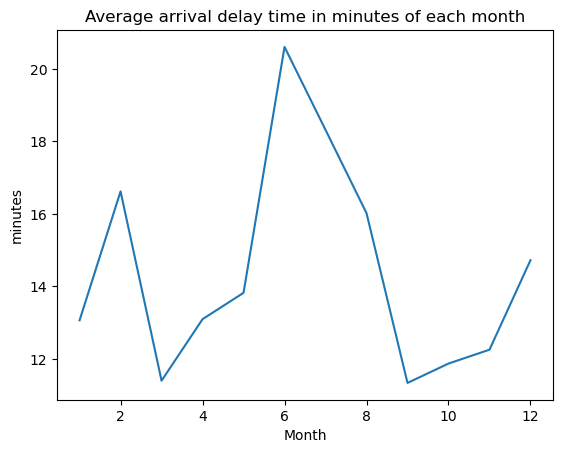

In [134]:
sns.lineplot(data = df_month_arr, x = df_month_arr.index, y = "mean")
plt.title("Average arrival delay time in minutes of each month")
plt.ylabel("minutes")

In [135]:
del df_month_arr

In [136]:
df_month_dep = df.groupby("Month")["dep_delay_minutes"].describe()
df_month_dep

,count,mean,std,min,25%,50%,75%,max
Month,,,,,,,,
1,2884.0,13.181692,44.646066,0.0,0.0,0.0,2.0,932.0
2,2682.0,16.024981,60.156824,0.0,0.0,0.0,6.0,1147.0
3,3038.0,11.299210,37.430005,0.0,0.0,0.0,2.0,929.0
4,2730.0,13.316117,54.147845,0.0,0.0,0.0,2.0,1105.0
5,2218.0,13.678990,46.714902,0.0,0.0,0.0,4.0,1097.0
6,2199.0,20.701228,67.863418,0.0,0.0,0.0,8.0,1245.0
7,2438.0,17.760459,63.779646,0.0,0.0,0.0,5.0,1209.0
8,2539.0,15.835368,50.208608,0.0,0.0,0.0,6.0,1079.0
9,2357.0,11.177768,43.692573,0.0,0.0,0.0,0.0,964.0


Text(0, 0.5, 'minutes')

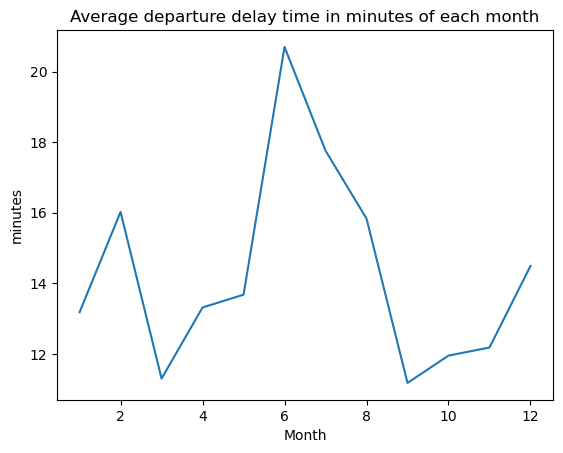

In [137]:
sns.lineplot(data = df_month_dep, x = df_month_dep.index, y = "mean")
plt.title("Average departure delay time in minutes of each month")
plt.ylabel("minutes")

The distribution of arrival and departure dealy in each month is almost identical. The highest average delay time is on June. July, August and December also have higher delay time. 

In [138]:
del df_month_dep

# What kind of things cause the departure and arrival delay?

Text(0.5, 0, 'Time period')

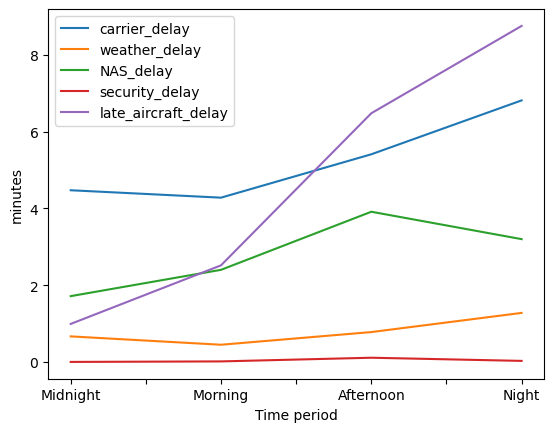

In [139]:
df_delay_kind = df[["dep_period", "carrier_delay", "weather_delay", "NAS_delay","security_delay", "late_aircraft_delay"]]
df_delay_kind.groupby("dep_period").mean().plot()
plt.ylabel("minutes")
plt.xlabel("Time period")

The late aircraft delay is higher in the afternoon and night, while other kinds of delay don't vary too much during each period of a day.

In [140]:
del df_delay_kind

# The trend of delay from 2018-2023

In [141]:
df_time = df.groupby("flight_date").describe().head()

## Departure Delay

Text(0.5, 0, 'Date')

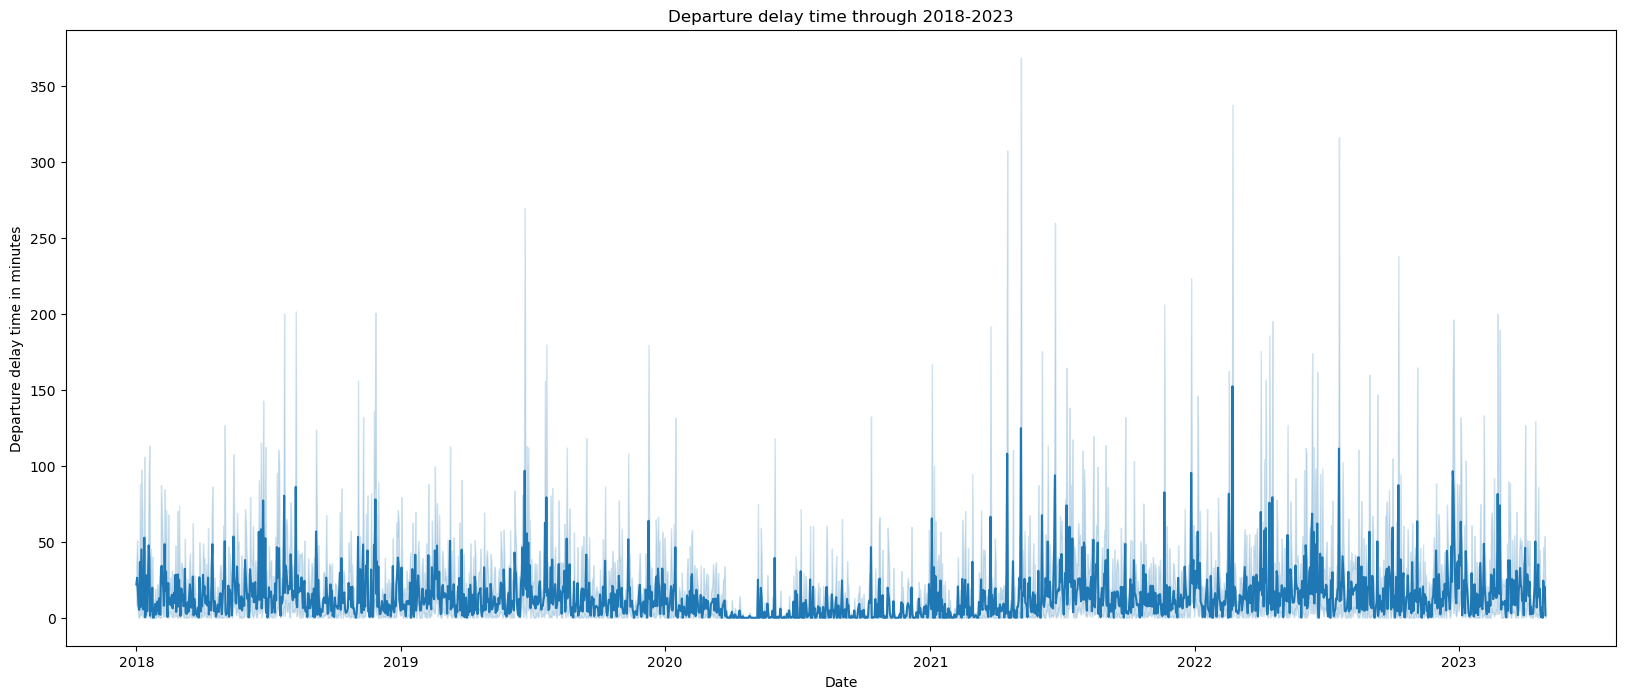

In [142]:
fig, ax = plt.subplots(figsize = (20,8)) 
sns.lineplot(data = df, x = "flight_date", y = "dep_delay_minutes", ax = ax)
plt.title("Departure delay time through 2018-2023")
plt.ylabel("Departure delay time in minutes")
plt.xlabel("Date")

The departrue delay time is relatively low in 2020. At the end of 2022 and beginning of 2023, the arrival delay time is the highest through out the 2018-2023 period.

## Arrival delay

Text(0.5, 0, 'Date')

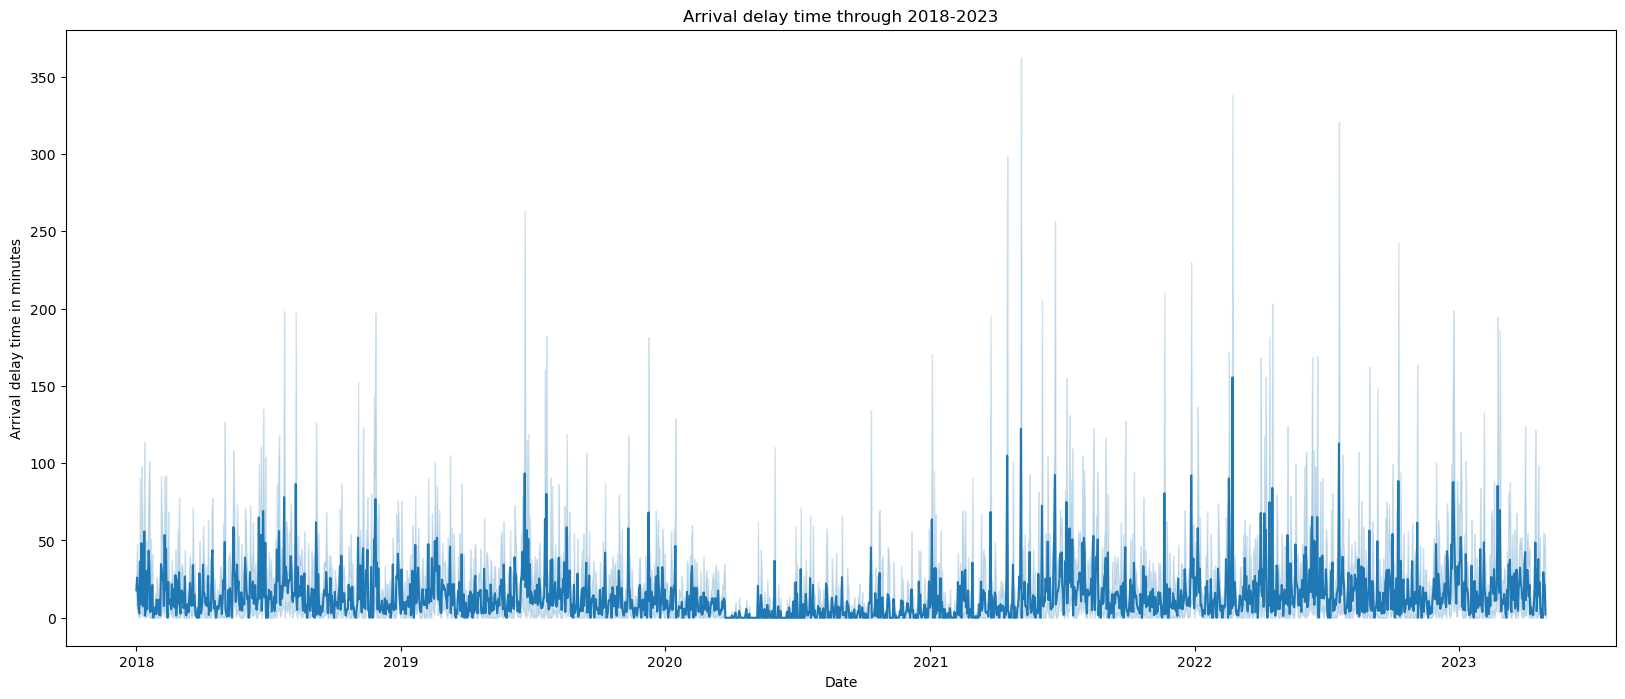

In [143]:
fig, ax = plt.subplots(figsize = (20,8)) 
sns.lineplot(data = df, x = "flight_date", y = "arr_delay_minutes", ax = ax)
plt.title("Arrival delay time through 2018-2023")
plt.ylabel("Arrival delay time in minutes")
plt.xlabel("Date")

The arrival delay time distribution is almost identical as departure time. It is relatively low in 2020. At the end of 2022 and beginning of 2023, the arrival delay time is the highest through out the 2018-2023 period.

In [144]:
del df_time

# What types of delay correlate to the arrival and departure delay?

In [145]:
# Seperate continous varible
df_continuous = df[['CRS_dep_time', 'dep_time', 'depdelay',
       'dep_delay_minutes', 'taxi_out', 'wheels_off', 'wheels_on', 'taxi_in',
       'CRS_arr_time', 'arr_time', 'arr_delay', 'arr_delay_minutes',
       'CRS_elapsed_time', 'actual_elapsed_time', 'air_time', 'distance',
       'distance_group', 'carrier_delay', 'weather_delay', 'NAS_delay',
       'security_delay', 'late_aircraft_delay']]

In [146]:
# The corrletaion coefficient between each variable
df_continuous.corr()

,CRS_dep_time,dep_time,depdelay,dep_delay_minutes,taxi_out,wheels_off,wheels_on,taxi_in,CRS_arr_time,arr_time,arr_delay,arr_delay_minutes,CRS_elapsed_time,actual_elapsed_time,air_time,distance,distance_group,carrier_delay,weather_delay,NAS_delay,security_delay,late_aircraft_delay
CRS_dep_time,1.000000,0.956827,0.096454,0.091863,0.020173,0.926294,0.651965,-0.035903,0.716601,0.630456,0.096766,0.085747,-0.012941,-0.009394,-0.009314,-0.005889,-0.006691,0.023567,0.021680,0.029586,0.005505,0.106812
dep_time,0.956827,1.000000,0.121323,0.114543,0.028808,0.966217,0.675372,-0.030670,0.714064,0.652437,0.123020,0.107685,-0.016814,-0.011355,-0.012978,-0.011821,-0.012707,0.021597,0.020455,0.045156,-0.001740,0.145261
depdelay,0.096454,0.121323,1.000000,0.997375,0.081683,0.107310,0.020151,0.030759,0.080874,0.011117,0.969213,0.978939,0.023198,0.034727,0.021652,0.020509,0.019940,0.720345,0.276457,0.332610,0.115342,0.554777
dep_delay_minutes,0.091863,0.114543,0.997375,1.000000,0.078526,0.100683,0.015559,0.034108,0.077098,0.006918,0.966508,0.982009,0.016756,0.028290,0.015190,0.013737,0.013178,0.726051,0.278784,0.331223,0.117362,0.552267
taxi_out,0.020173,0.028808,0.081683,0.078526,1.000000,0.053466,0.029719,0.042088,0.028110,0.027425,0.220359,0.184044,0.075035,0.186815,0.049534,0.034821,0.034506,0.044323,0.058983,0.298736,0.002721,0.054048
wheels_off,0.926294,0.966217,0.107310,0.100683,0.053466,1.000000,0.700181,-0.028477,0.722782,0.676936,0.113703,0.097575,-0.025715,-0.017142,-0.022527,-0.024458,-0.025411,0.016062,0.014322,0.049562,-0.001700,0.132361
wheels_on,0.651965,0.675372,0.020151,0.015559,0.029719,0.700181,1.000000,-0.008716,0.836052,0.973173,0.022853,0.014130,0.022071,0.024958,0.022260,0.020942,0.022625,-0.016516,-0.004685,0.026386,-0.000602,0.035049
taxi_in,-0.035903,-0.030670,0.030759,0.034108,0.042088,-0.028477,-0.008716,1.000000,-0.015625,-0.007006,0.112421,0.095887,0.093283,0.158771,0.070107,0.061679,0.060809,0.016514,0.014187,0.178779,0.007877,0.027394
CRS_arr_time,0.716601,0.714064,0.080874,0.077098,0.028110,0.722782,0.836052,-0.015625,1.000000,0.833161,0.079158,0.072992,0.028190,0.029863,0.028119,0.026994,0.028913,0.017182,0.013326,0.035288,0.006938,0.089581
arr_time,0.630456,0.652437,0.011117,0.006918,0.027425,0.676936,0.973173,-0.007006,0.833161,1.000000,0.013955,0.005427,0.017491,0.020134,0.017477,0.015803,0.017600,-0.020620,-0.004737,0.024137,-0.000469,0.024698


In [147]:
del df_continuous

In [148]:
df_pair = df[["carrier_delay", "dep_delay_minutes", "late_aircraft_delay", "weather_delay", "NAS_delay", "security_delay"]]

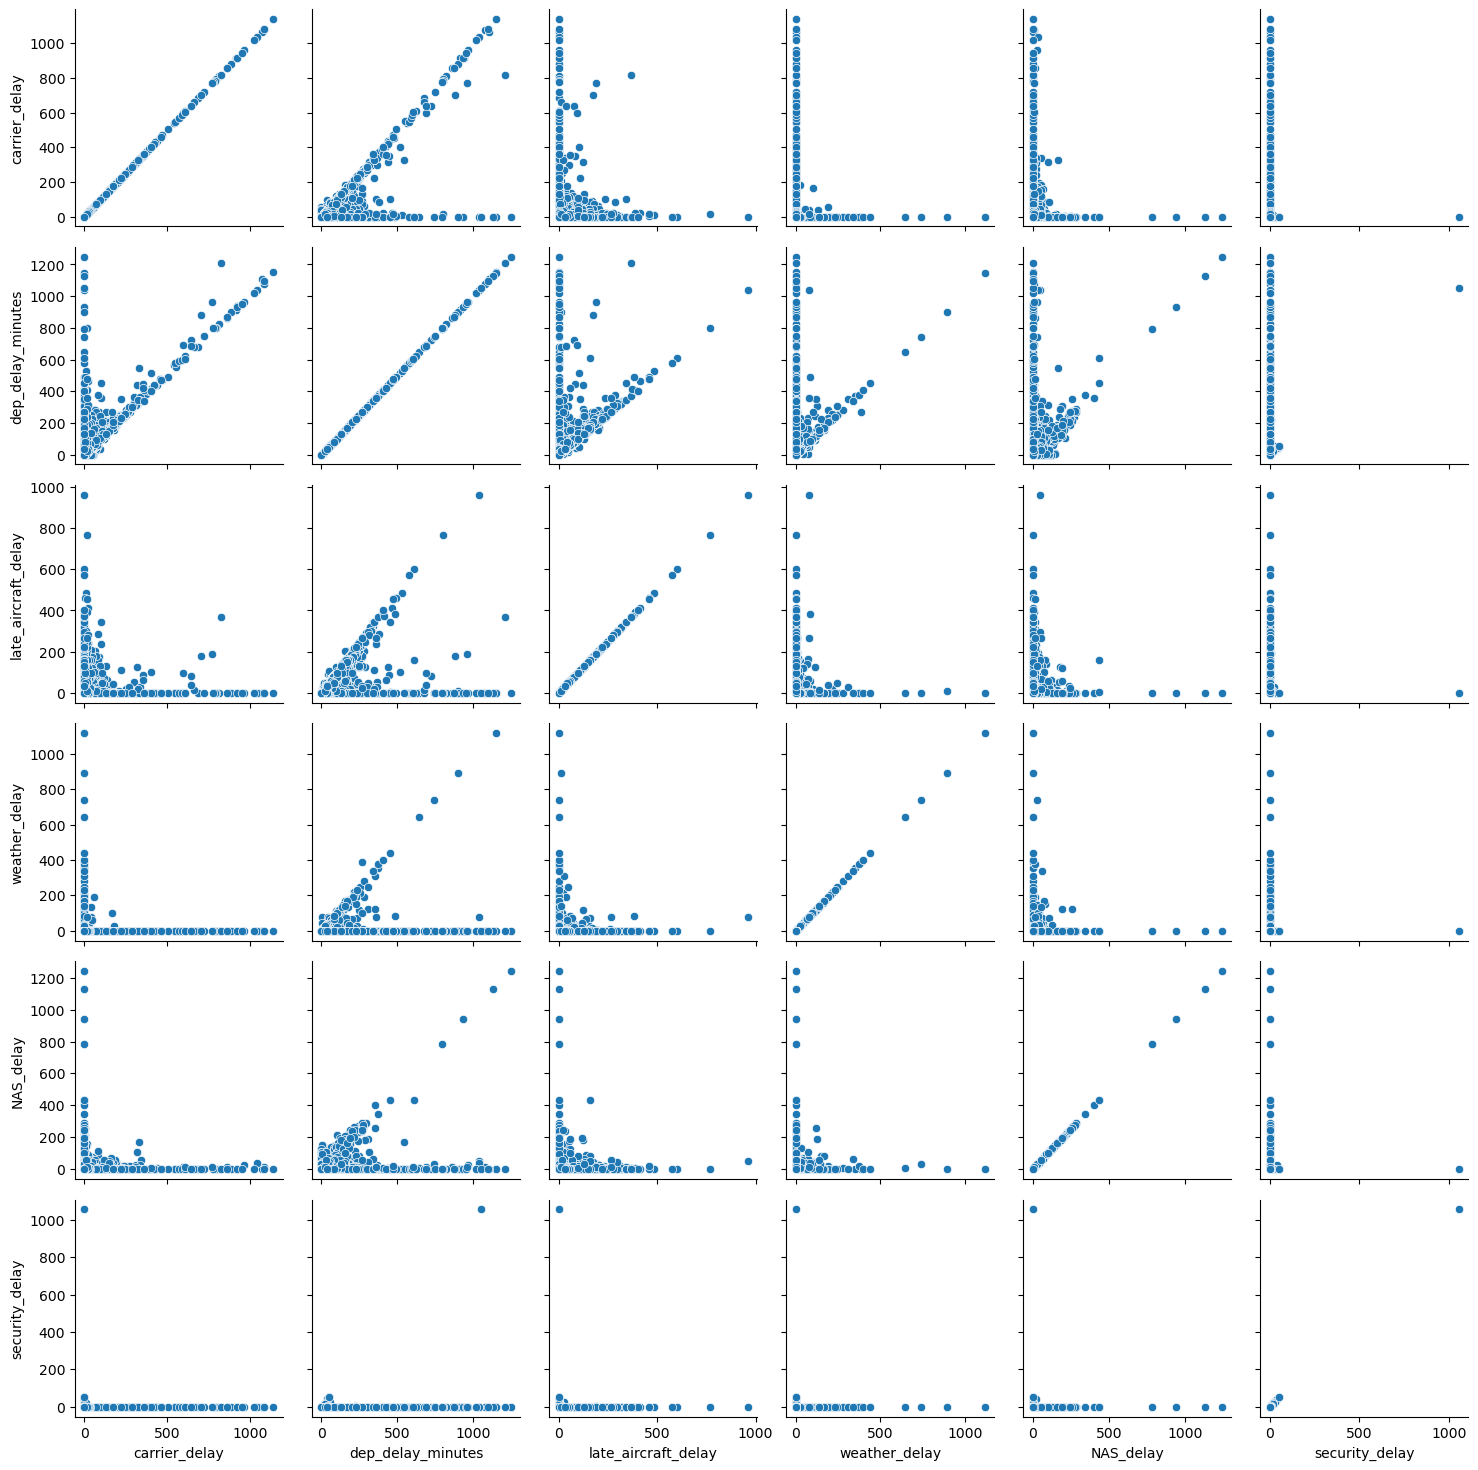

In [149]:
g = sns.PairGrid(df_pair)
g.map(sns.scatterplot)

In [150]:
del df_pair

The departure and arrival delay times exhibit a positive correlation with various factors, including carrier delays, late aircraft delays, weather delays,NAS delays, and security delays. Late aircraft, weather, NAS, and security delays demonstrate a tendency to increase more rapidly than departure and arrival delay times. This suggests that changes in late aircraft, weather, NAS, and security delays contribute disproportionately to the overall fluctuations in departure and arrival delays.